In [1]:
#Import Libraries and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

q1_data = pd.read_csv('Q1Data.csv')


#Function Declarations
def get_stats(df):
    count = len(df)
    mean = df.sum() / len(df)
    median = df.median()
    std = df.std()
    skewness = df.skew()
    kurtosis = df.kurtosis()
    stats = {
        'count': count,
        'mean': mean,
        'median': median,
        'std': std,
        'skewness': skewness,
        'kurtosis': kurtosis
    }
    stats = pd.Series(stats)
    print(stats)
    
    
def get_outliers(df):

    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.5)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = df[(df < lower_limit) | (df  > upper_limit)]
    return outliers

def remove_outliers(df):
    outliers = get_outliers(df)
    outliers_removed_df = df[(~df.isin(outliers))].reset_index(drop=True)

    return outliers_removed_df 


def replace_outliers(df):
    replace_outliers_df = df.copy()
    outliers = get_outliers(df)
    median = df.median()
    #Q2 = replace_outliers_df.quantile(0.5)
    replace_outliers_df = np.where(replace_outliers_df.isin(outliers), median, replace_outliers_df)

    return replace_outliers_df
    



In [2]:
#Data summary
q1_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [3]:
#Additional statistics for total_items
get_stats(q1_data.total_items)

count       5000.000000
mean           8.787200
median         2.000000
std          116.320320
skewness      17.065556
kurtosis     289.369953
dtype: float64


For a retail store with only one product, in this case a sneaker, the mean, and standard deviation of order quantity seem abnormal. Further, the max order size of 2000 indicates that outliers are present in the dataset, likely giving an inaccurate AOV.

In [4]:
#Output some data samples
q1_data.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [5]:
#Calculcate AOV without modifying data

def get_AOV(df):
    AOV = np.round(df.sum() / df.size,2)
    return AOV

AOV = get_AOV(q1_data.order_amount)
print('AOV = {} without any modifications to dataset'.format(AOV))

AOV = 3145.13 without any modifications to dataset


The formula used for AOV looks like it included outliers.

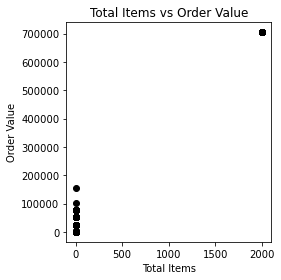

In [6]:
#Plotting Total order items against Order Value

Items_fig, (total_items) = plt.subplots(nrows=1, ncols=1,figsize=(4,4))  #Al graphs removed
plot_title = 'Total Items vs Order Value'
total_items.set_title(plot_title)
total_items.scatter(q1_data.total_items, q1_data.order_amount, color='black')
total_items.set_xlabel('Total Items')
total_items.set_ylabel('Order Value')
plt.tight_layout()
plt.show()


In [7]:
#Identifying Outliers based on order amount

outliers = get_outliers(q1_data.order_amount)
    
num_outliers = len(outliers)
percent_outliers = num_outliers / len(q1_data.order_amount) * 100
print('{} outliers found. Outliers make up {}% of dataset'.format(num_outliers, percent_outliers))


141 outliers found. Outliers make up 2.82% of dataset


In [8]:
#Original Method
AOV = get_AOV(q1_data.order_amount)
print('AOV = {} without any modifications to dataset'.format(AOV))

#MOV Calculation
def get_MOV(df):
    MOV = np.round(df.median(), 2)
    return MOV    

MOV = get_MOV(q1_data.order_amount)
print('MOV = {} without any modifications to dataset'.format(MOV))


#AOV Calculation Method 1
#With Order Amount Outliers removed from dataset

order_amounts_no_outliers = remove_outliers(q1_data.order_amount)
AOV_1 = get_AOV(order_amounts_no_outliers)
print('AOV = {} with outliers removed from dataset'.format(AOV_1))

#AOV Calculation Method 2
#With Order Amount Outliers replaced in dataset

order_amounts_replaced_outliers = replace_outliers(q1_data.order_amount)
AOV_2 = get_AOV(order_amounts_replaced_outliers)
print('AOV = {} with outliers replaced with median'.format(AOV_2))


AOV = 3145.13 without any modifications to dataset
MOV = 284.0 without any modifications to dataset
AOV = 293.72 with outliers removed from dataset
AOV = 293.44 with outliers replaced with median
